# Análisis EDA de productores beneficiarios 2023

# 1. Importación de librerías y carga de datos

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns', None)

In [2]:
lista_beneficiarios = pd.read_csv('../../data/LISTADO_BENEFICIARIOS2023_COMPLETO.csv', dtype={'cve_mun': str, 'cve_ent': str})

# 2. Análisis Inicial

## 2.1 Estructura de los datos

In [3]:
lista_beneficiarios.columns

Index(['ESTADO', 'MUNICIPIO', 'ACUSE ESTATAL', 'APELLIDO PATERNO',
       'APELLIDO MATERNO', 'NOMBRE (S)', 'PAQUETE', 'KEY_benef_Verificado',
       'Entidad_inegi', 'Municipio_inegi', 'CVE_ENT', 'CVE_MUN'],
      dtype='object')

## 2.2 Información general

In [4]:
lista_beneficiarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680105 entries, 0 to 1680104
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ESTADO                1680105 non-null  object 
 1   MUNICIPIO             1680105 non-null  object 
 2   ACUSE ESTATAL         1680105 non-null  object 
 3   APELLIDO PATERNO      1680104 non-null  object 
 4   APELLIDO MATERNO      1653877 non-null  object 
 5   NOMBRE (S)            1680105 non-null  object 
 6   PAQUETE               1680097 non-null  float64
 7   KEY_benef_Verificado  1680105 non-null  object 
 8   Entidad_inegi         1680105 non-null  object 
 9   Municipio_inegi       1680105 non-null  object 
 10  CVE_ENT               1680105 non-null  int64  
 11  CVE_MUN               1680105 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 153.8+ MB


## 2.3 Estadísticas Descriptivas

In [5]:
# Obtener estadísticas descriptivas para todas las variables
descriptive_stats = lista_beneficiarios.describe(include='all').transpose()

# Mostrar las estadísticas descriptivas
print(descriptive_stats)

                          count   unique                             top  \
ESTADO                  1680105       30                        GUERRERO   
MUNICIPIO               1680105     2237                  LAS MARGARITAS   
ACUSE ESTATAL           1680105  1680105  23-PROESFE-ESTR-000051-E000-SL   
APELLIDO PATERNO        1680104    14995                       HERNANDEZ   
APELLIDO MATERNO        1653877    17604                       HERNANDEZ   
NOMBRE (S)              1680105   124628                            JUAN   
PAQUETE               1680097.0      NaN                             NaN   
KEY_benef_Verificado    1680105     2335          chiapas-las margaritas   
Entidad_inegi           1680105       30                        Guerrero   
Municipio_inegi         1680105     2216                  Las Margaritas   
CVE_ENT               1680105.0      NaN                             NaN   
CVE_MUN               1680105.0      NaN                             NaN   

           

# 3. Limpieza de Datos

## 3.1 Valores Nulos

In [6]:
valores_nulos = lista_beneficiarios.isna().sum()
print(valores_nulos)

ESTADO                      0
MUNICIPIO                   0
ACUSE ESTATAL               0
APELLIDO PATERNO            1
APELLIDO MATERNO        26228
NOMBRE (S)                  0
PAQUETE                     8
KEY_benef_Verificado        0
Entidad_inegi               0
Municipio_inegi             0
CVE_ENT                     0
CVE_MUN                     0
dtype: int64


## 3.2 Decisiones sobre valores nulos

Se decide mantener las 8 filas con paquetes nulos.

## 3.3 Valores Duplicados

In [9]:
# Filas completas duplicadas
duplicated_rows_beneficiarios = lista_beneficiarios.drop(columns = ['ACUSE ESTATAL'])

filas_duplicadas = duplicated_rows_beneficiarios.duplicated().sum()
print(f'Hay {filas_duplicadas} filas duplicadas si quitamos el identificador de ACUSE ESTATAL.')

Hay 34083 filas duplicadas si quitamos el identificador de ACUSE ESTATAL.


In [11]:
lista_beneficiarios['ACUSE ESTATAL'].duplicated().sum()

0

La variable de ACUSE ESTATAL sí es única.

## 3.4 Decisiones sobre valores duplicados

In [12]:
# Chunk vacío a propósito.



Se decide no tomar acción con las filas duplicadas.

## 3.5 Corrección de Tipos de Datos

In [14]:
lista_beneficiarios.columns

Index(['ESTADO', 'MUNICIPIO', 'ACUSE ESTATAL', 'APELLIDO PATERNO',
       'APELLIDO MATERNO', 'NOMBRE (S)', 'PAQUETE', 'KEY_benef_Verificado',
       'Entidad_inegi', 'Municipio_inegi', 'CVE_ENT', 'CVE_MUN'],
      dtype='object')

In [24]:
lista_beneficiarios = lista_beneficiarios.astype({
    'ESTADO': 'str',
    'MUNICIPIO': 'str',
    'ACUSE ESTATAL': 'str',
    'APELLIDO PATERNO': 'str',
    'APELLIDO MATERNO': 'str',
    'NOMBRE (S)': 'str',
    'PAQUETE': 'float64',
    'Municipio_inegi': 'str',
    'Entidad_inegi': 'str',
    'CVE_MUN': 'str',
    'CVE_ENT': 'str',
    'KEY_benef_Verificado' : 'str'
})

In [ ]:
lista_productores.info()

In [ ]:

lista_productores[['ESTADO_c', 'MUN_c']] = lista_productores['KEY_inegi'].str.split('-', expand=True)


# 4. Análisis Univariado

## 4.1 Variables Numéricas

En este caso, la única variable númerica es la de paquetes.

<Axes: xlabel='PAQUETE'>

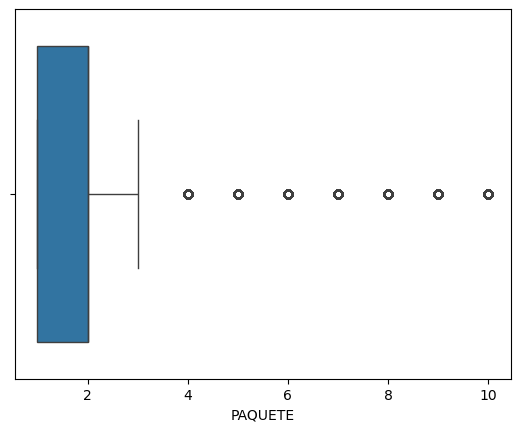

In [27]:
sns.boxplot(x=lista_beneficiarios["PAQUETE"])

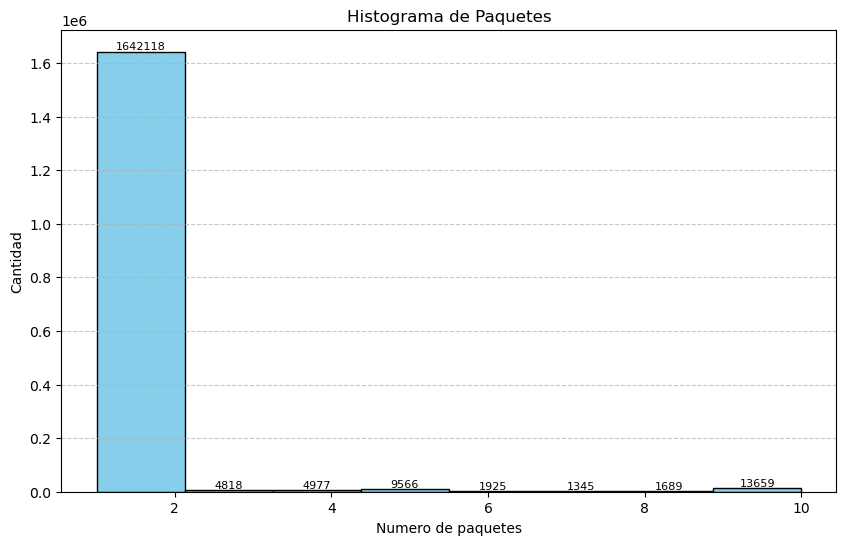

In [28]:
# Filtrar los datos para estar dentro del rango de interés
paquetes = lista_beneficiarios['PAQUETE']

# Crear el histograma con un mayor número de bins
plt.figure(figsize=(10, 6))
barras = plt.hist(paquetes,bins=8,color='skyblue', edgecolor='black')
plt.xlabel('Numero de paquetes')
plt.ylabel('Cantidad')
plt.title('Histograma de Paquetes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Recorrer las barras
for i in range(len(barras[0])):
    # Obtener el valor de la barra
    valor = barras[0][i]

     # Calcular la posición x de la anotación como el centro de la barra
    bar_width = barras[1][1] - barras[1][0]  # Ancho de las barras
    x_pos = barras[1][i] + bar_width / 2  # Posición x del centro de la barra

    # Mostrar el valor encima de la barra
    plt.annotate(f"{valor:.0f}", xy=(x_pos, valor),
                 ha="center", va="bottom", fontsize=8, color="black")

plt.show()

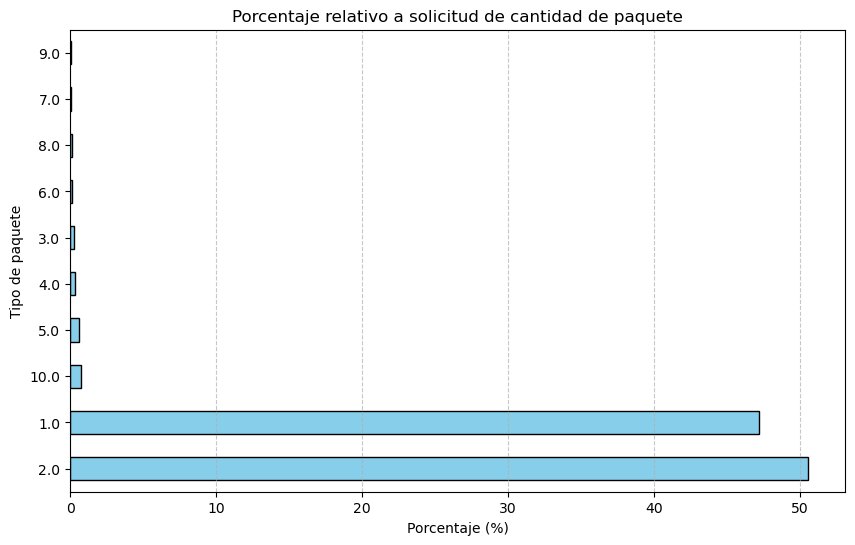

In [29]:
# Contar el número de cada tipo de 'PAQUETE'
grouped_df = lista_beneficiarios['PAQUETE'].value_counts()

# Calcular el porcentaje relativo de cada tipo de paquete
percentage_df = (grouped_df / grouped_df.sum()) * 100

# Crear el gráfico de barras apiladas
percentage_df.plot(kind='barh', stacked=True, color='skyblue', edgecolor='black', figsize=(10, 6))

plt.xlabel('Porcentaje (%)')
plt.ylabel('Tipo de paquete')
plt.title('Porcentaje relativo a solicitud de cantidad de paquete')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

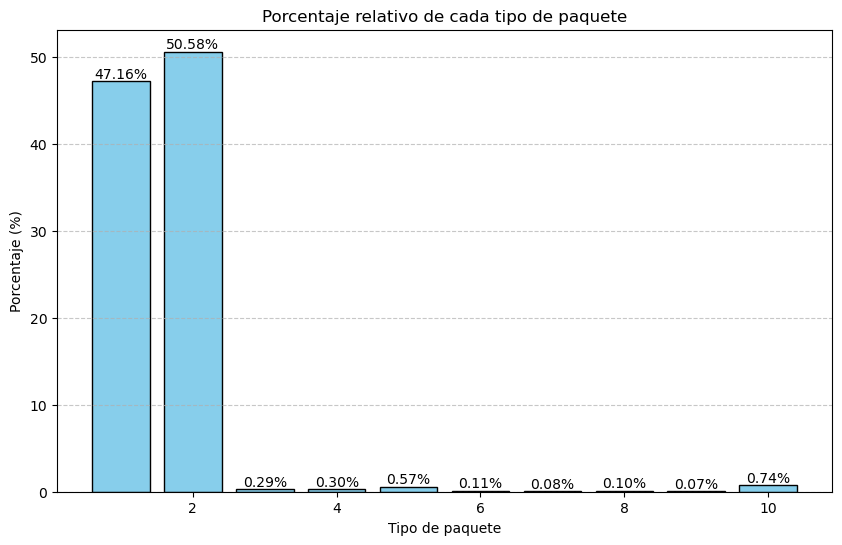

In [30]:
# Contar el número de cada tipo de 'PAQUETE'
grouped_df = lista_beneficiarios['PAQUETE'].value_counts()

# Calcular el porcentaje relativo de cada tipo de paquete
percentage_df = (grouped_df / grouped_df.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.bar(percentage_df.index, percentage_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Tipo de paquete')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje relativo de cada tipo de paquete')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.2f}%',
             ha='center', va='bottom')

plt.show()

## 4.2 Variables Categóricas

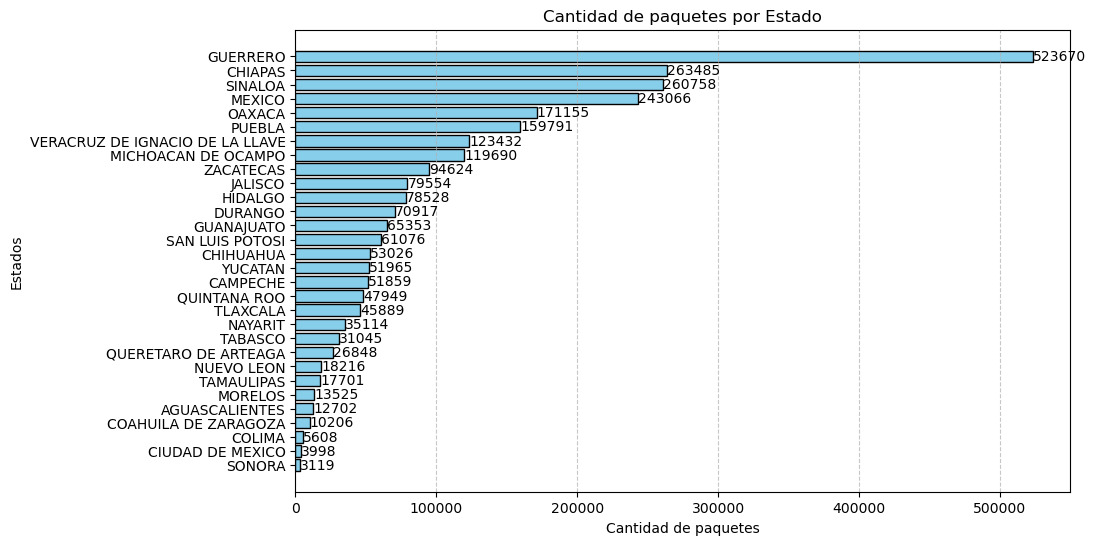

In [32]:
# Agrupar los datos por 'ESTADO' y sumar el número de 'PAQUETE'
grouped_df = lista_beneficiarios.groupby("ESTADO")["PAQUETE"].sum()

# Ordenar los datos de forma descendente
grouped_df = grouped_df.sort_values(ascending=True)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
barras = plt.barh(grouped_df.index, grouped_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad de paquetes')
plt.ylabel('Estados')
plt.title('Cantidad de paquetes por Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}', 
             va='center', ha='left')

plt.show()

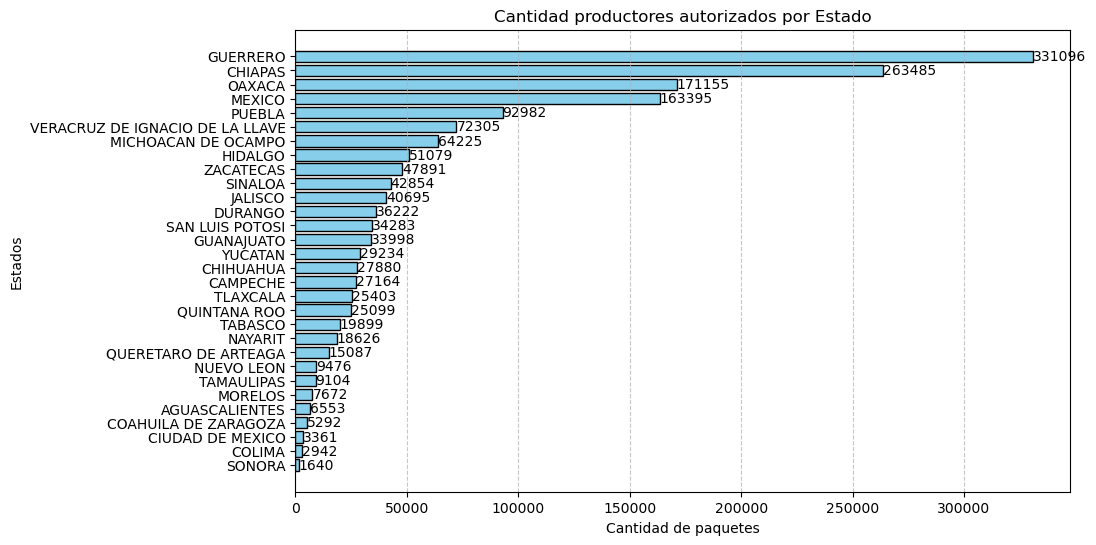

In [34]:
# Agrupar los datos por 'ESTADO' y sumar el número de 'PAQUETE'
grouped_df = lista_beneficiarios.groupby("ESTADO")["PAQUETE"].count()

# Ordenar los datos de forma descendente
grouped_df = grouped_df.sort_values(ascending=True)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
barras = plt.barh(grouped_df.index, grouped_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad de paquetes')
plt.ylabel('Estados')
plt.title('Cantidad productores autorizados por Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}', 
             va='center', ha='left')

plt.show()

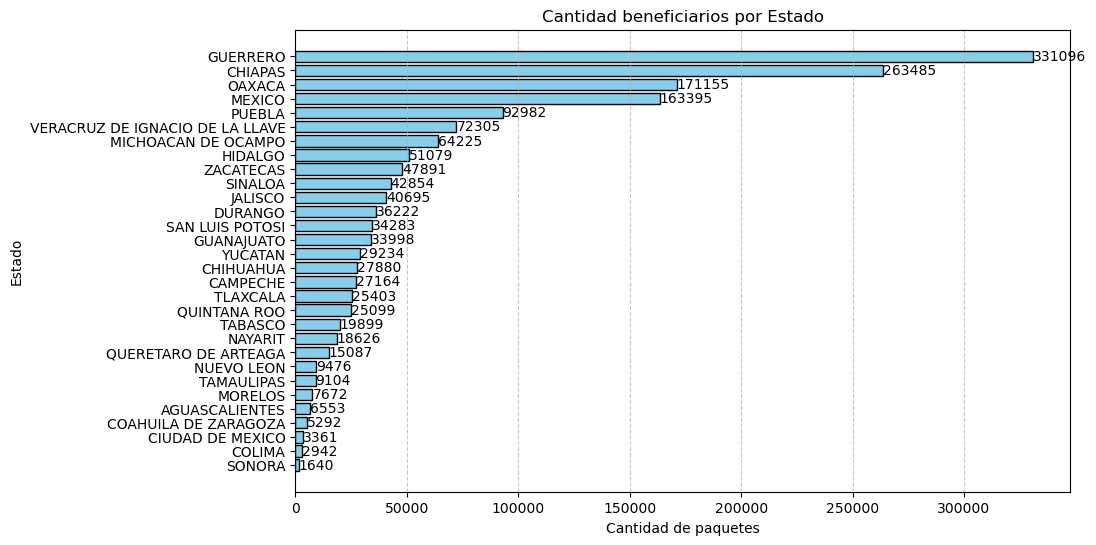

In [39]:
# Estado y numero de paquetes por ESTADO
lista_productores_filtrada = lista_beneficiarios

# Agrupar los datos filtrados por 'ESTADO' y contar el número de 'PAQUETE'
grouped_df = lista_productores_filtrada.groupby("ESTADO")["PAQUETE"].count()

# Ordenar los datos de forma descendente
grouped_df = grouped_df.sort_values(ascending=True)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
barras = plt.barh(grouped_df.index, grouped_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad de paquetes')
plt.ylabel('Estado')
plt.title('Cantidad beneficiarios por Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}', 
             va='center', ha='left')

plt.show()

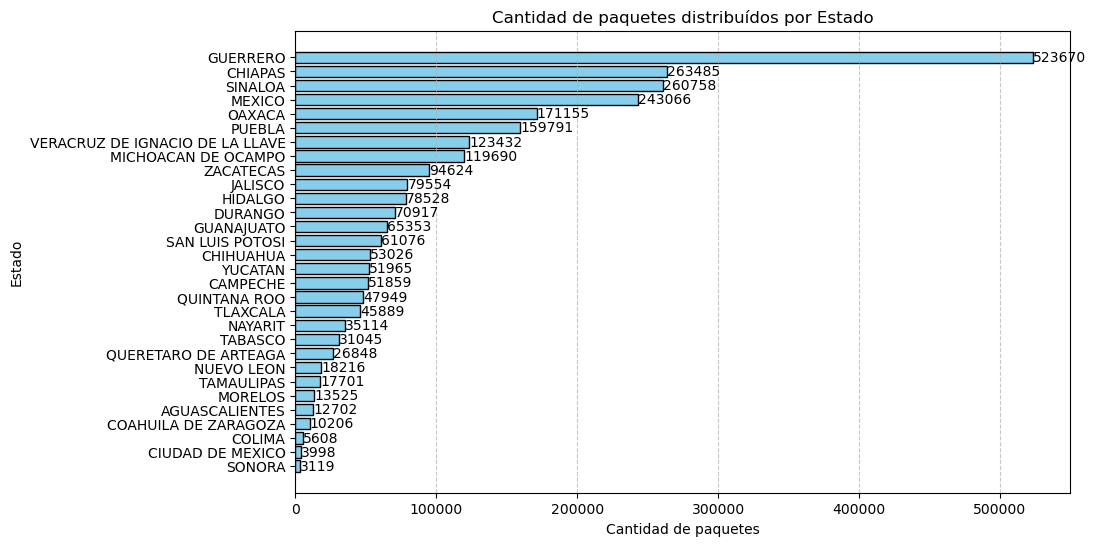

In [41]:
# Filtrar los datos donde 'PAQUETE' es 2
lista_productores_filtrada = lista_beneficiarios

# Agrupar los datos filtrados por 'ESTADO' y contar el número de 'PAQUETE'
grouped_df = lista_productores_filtrada.groupby("ESTADO")["PAQUETE"].sum()

# Ordenar los datos de forma descendente
grouped_df = grouped_df.sort_values(ascending=True)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
barras = plt.barh(grouped_df.index, grouped_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad de paquetes')
plt.ylabel('Estado')
plt.title('Cantidad de paquetes distribuídos por Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}', 
             va='center', ha='left')

plt.show()

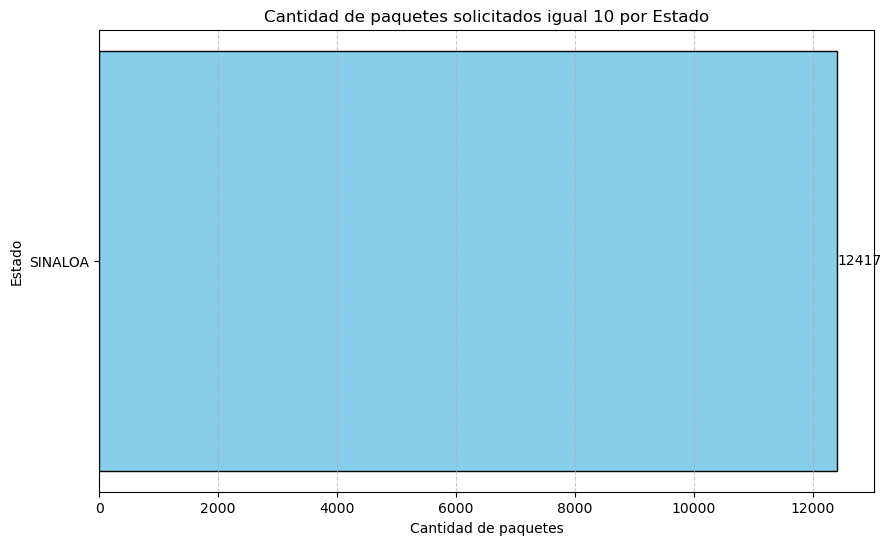

In [44]:
# Filtrar los datos donde 'PAQUETE' es 2
lista_productores_filtrada = lista_beneficiarios[lista_beneficiarios['PAQUETE'] == 10]

# Agrupar los datos filtrados por 'ESTADO' y contar el número de 'PAQUETE'
grouped_df = lista_productores_filtrada.groupby("ESTADO")["PAQUETE"].count()

# Ordenar los datos de forma descendente
grouped_df = grouped_df.sort_values(ascending=True)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
barras = plt.barh(grouped_df.index, grouped_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad de paquetes')
plt.ylabel('Estado')
plt.title('Cantidad de paquetes solicitados igual 10 por Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}', 
             va='center', ha='left')

plt.show()

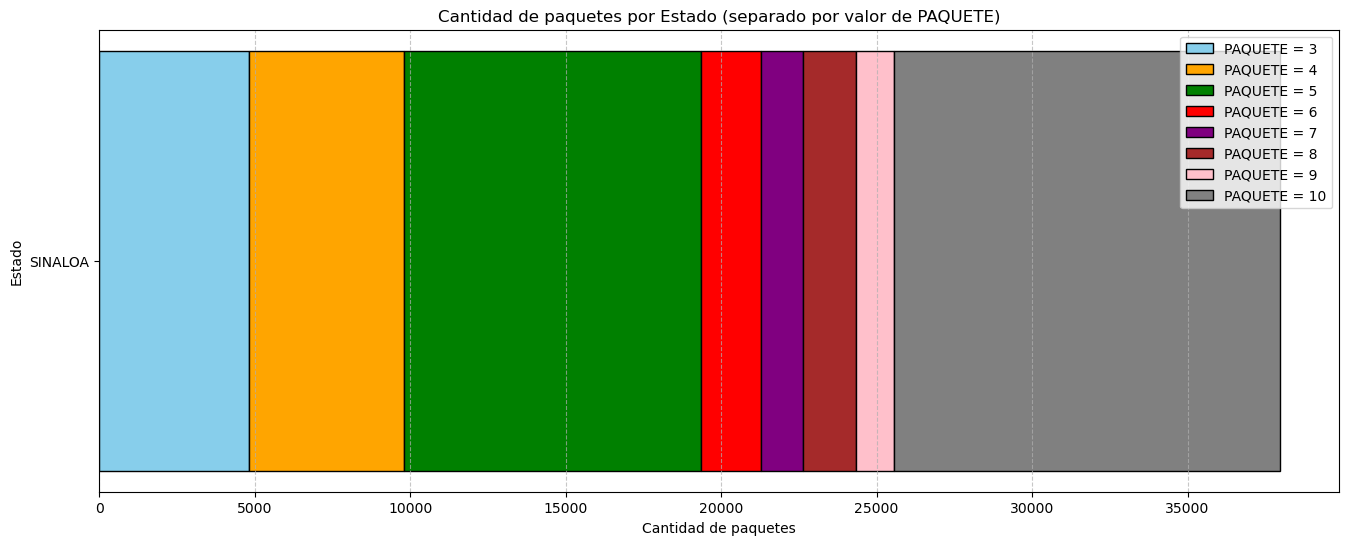

In [46]:
	
# Filtrar los datos donde 'PAQUETE' es 1 y 2
lista_productores_filtrada1 = lista_beneficiarios[lista_beneficiarios['PAQUETE'] == 3]
lista_productores_filtrada2 = lista_beneficiarios[lista_beneficiarios['PAQUETE'] == 4]
lista_productores_filtrada3 = lista_beneficiarios[lista_beneficiarios['PAQUETE'] == 5]
lista_productores_filtrada4 = lista_beneficiarios[lista_beneficiarios['PAQUETE'] == 6]
lista_productores_filtrada5 = lista_beneficiarios[lista_beneficiarios['PAQUETE'] == 7]
lista_productores_filtrada6 = lista_beneficiarios[lista_beneficiarios['PAQUETE'] == 8]
lista_productores_filtrada7 = lista_beneficiarios[lista_beneficiarios['PAQUETE'] == 9]
lista_productores_filtrada8 = lista_beneficiarios[lista_beneficiarios['PAQUETE'] == 10]


# Agrupar los datos filtrados por 'ESTADO' y contar el número de 'PAQUETE'
grouped_df1 = lista_productores_filtrada1.groupby("ESTADO")["PAQUETE"].count()
grouped_df2 = lista_productores_filtrada2.groupby("ESTADO")["PAQUETE"].count()
grouped_df3 = lista_productores_filtrada3.groupby("ESTADO")["PAQUETE"].count()
grouped_df4 = lista_productores_filtrada4.groupby("ESTADO")["PAQUETE"].count()
grouped_df5 = lista_productores_filtrada5.groupby("ESTADO")["PAQUETE"].count()
grouped_df6 = lista_productores_filtrada6.groupby("ESTADO")["PAQUETE"].count()
grouped_df7 = lista_productores_filtrada7.groupby("ESTADO")["PAQUETE"].count()
grouped_df8 = lista_productores_filtrada8.groupby("ESTADO")["PAQUETE"].count()

# Create a list of all grouped dataframes
grouped_dfs = [grouped_df1, grouped_df2, grouped_df3, grouped_df4, grouped_df5, grouped_df6, grouped_df7, grouped_df8]

# Define a list of colors for the bars
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Create the horizontal bar chart
plt.figure(figsize=(16, 6))

# Ensure that the indices of all DataFrames are the same
index = grouped_dfs[0].index
for df in grouped_dfs[1:]:
    index = np.union1d(index, df.index)

for df in grouped_dfs:
    df.reindex(index, fill_value=0)

# Create the bars for each group
lefts = np.zeros(len(index))
for df, color in zip(grouped_dfs, colors):
    bars = plt.barh(index, df.values, color=color, edgecolor='black', left=lefts)
    lefts += df.values

plt.xlabel('Cantidad de paquetes')
plt.ylabel('Estado')
plt.title('Cantidad de paquetes por Estado (separado por valor de PAQUETE)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(['PAQUETE = {}'.format(i) for i in range(3, 11)])

plt.show()

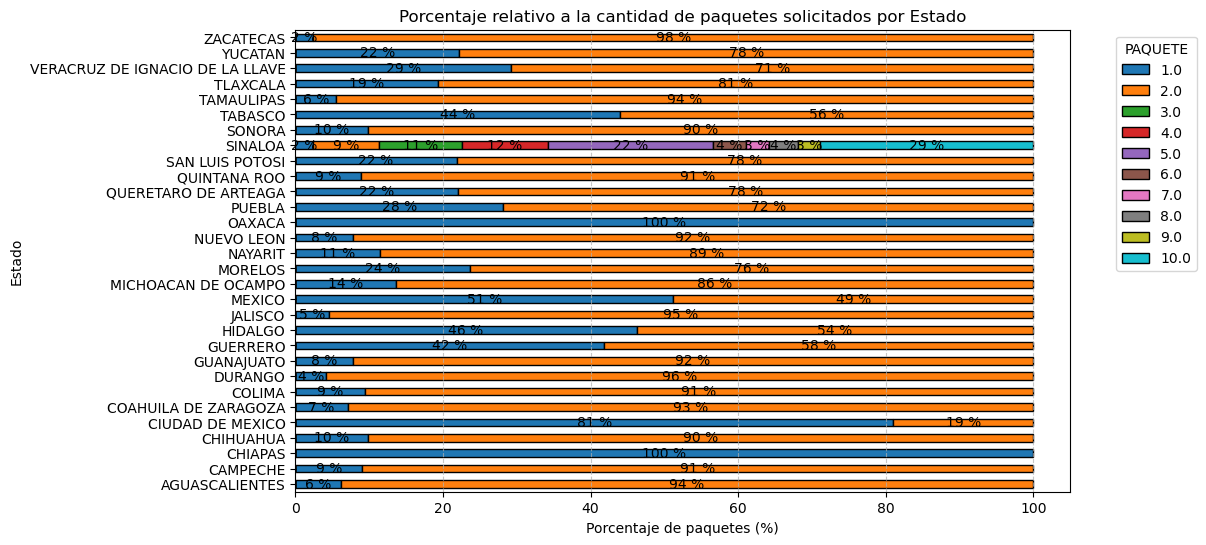

In [49]:
# Agrupar los datos por 'NOM_ENT' y 'PAQUETE', y contar el número de 'PAQUETE'
grouped_df = lista_beneficiarios.groupby(["ESTADO", "PAQUETE"]).size().unstack(fill_value=0)

# Calcular el porcentaje relativo de cada tipo de paquete por estado
percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
percentage_df.plot(kind='barh', stacked=True, edgecolor='black', ax=ax)

plt.xlabel('Porcentaje de paquetes (%)')
plt.ylabel('Estado')
plt.title('Porcentaje relativo a la cantidad de paquetes solicitados por Estado')
plt.legend(title='PAQUETE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if width > 0:
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(width), 
                horizontalalignment='center', 
                verticalalignment='center')

plt.show()

# 5. Análisis Multivariado

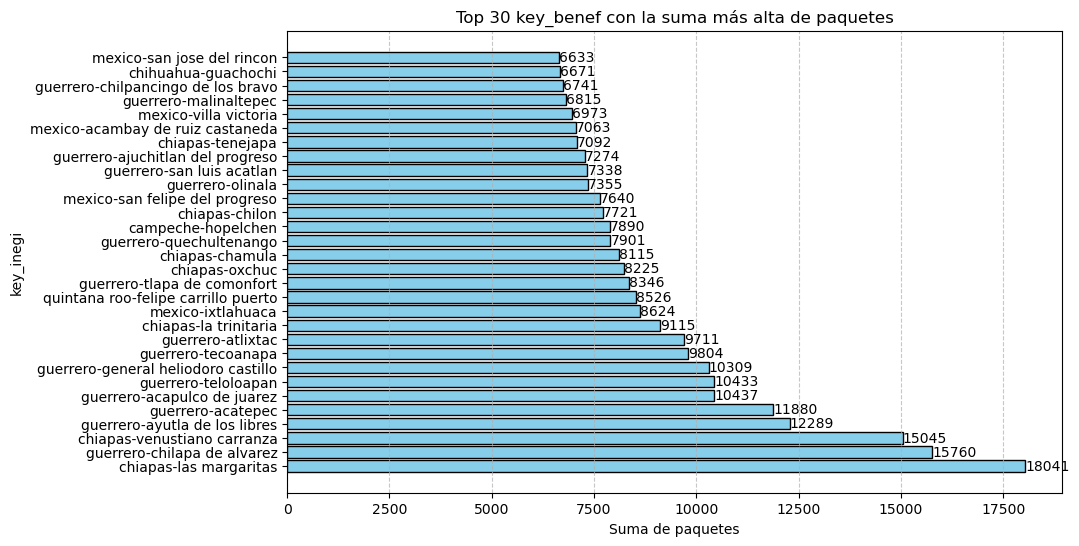

In [51]:
# Paquetes por municipio top20 
grouped_df = lista_beneficiarios.groupby("KEY_benef_Verificado")["PAQUETE"].count() 

# Ordenar los resultados en orden descendente y seleccionar los primeros 20
top20_df = grouped_df.sort_values(ascending=False).head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.barh(top20_df.index, top20_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Suma de paquetes')
plt.ylabel('key_inegi')
plt.title('Top 30 key_benef con la suma más alta de paquetes')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}',
             va='center', ha='left')

plt.show()